In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler

In [14]:
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])

plt.rc('figure',facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color = 'gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')

In [15]:
def preprocessing(name):
      df = pd.read_csv(name, delimiter="\t", index_col="<DATE>", parse_dates=True)
      df = df.iloc[:,:-2]
      df.columns = ["open", "high", "low", "close", "volume"]
      df.index.name="time"
      return df

In [16]:
def preprocessing_yf(symbol):
  df = yf.download(symbol)
  df.columns=["open", "high", "low", "close", "adj close", "volulme"]
  df.index.name="time"
  del df["adj close"]
  return df

In [17]:
df = preprocessing_yf("EURUSD=X")
df["SMA fast"] = df["close"].rolling(30).mean()
df["SMA slow"] =df["close"].rolling(60).mean()
df

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volulme,SMA fast,SMA slow
time,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0,NaN,NaN
2003-12-02,1.196101,1.210903,1.194600,1.208897,0,NaN,NaN
2003-12-03,1.209000,1.213003,1.207700,1.212298,0,NaN,NaN
2003-12-04,1.212004,1.214403,1.204398,1.208094,0,NaN,NaN
2003-12-05,1.207802,1.219096,1.206593,1.218695,0,NaN,NaN
...,...,...,...,...,...,...,...
2023-01-31,1.085069,1.086838,1.080415,1.085069,0,1.073797,1.057813
2023-02-01,1.086095,1.092443,1.085293,1.086095,0,1.074577,1.059113
2023-02-02,1.101285,1.102657,1.088767,1.101285,0,1.075919,1.060769


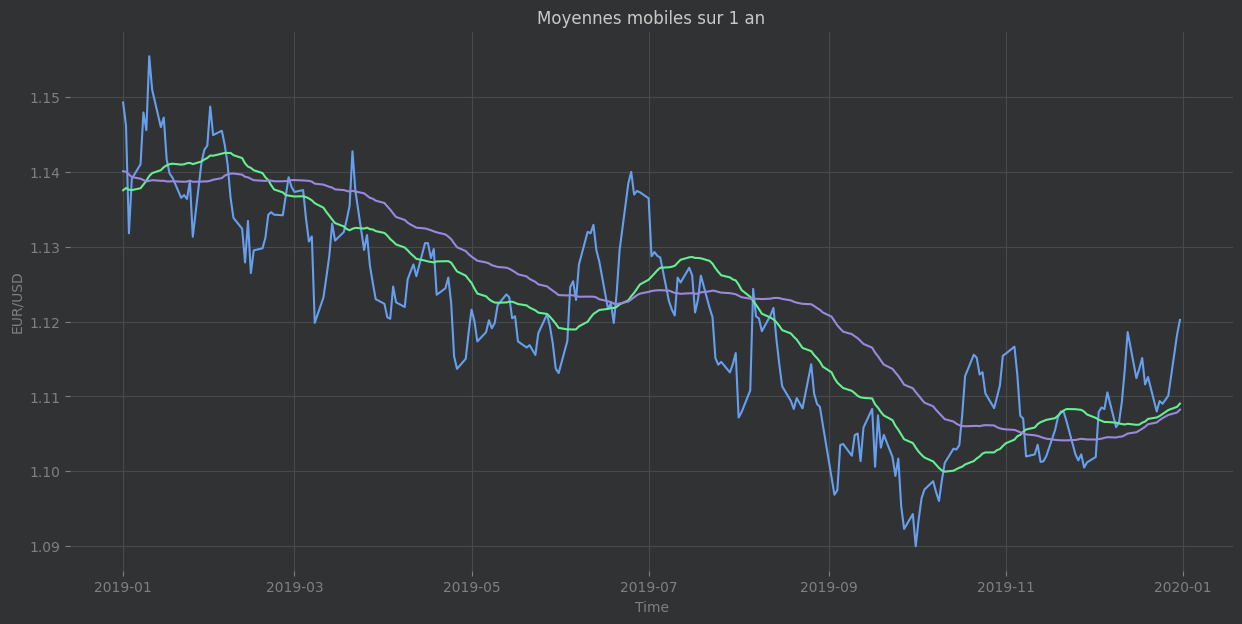

In [18]:
plt.figure(figsize=(15,7))
plt.xlabel("Time")
plt.ylabel("EUR/USD")

plt.title("Moyennes mobiles sur 1 an")
plt.plot(df[["close", "SMA fast", "SMA slow"]].loc["2019"])


plt.show()

In [19]:
df["position"] = np.nan

df.loc[(df["SMA fast"]>df["SMA slow"]), "position"]=1
df.loc[(df["SMA fast"]<df["SMA slow"]), "position"]=-1


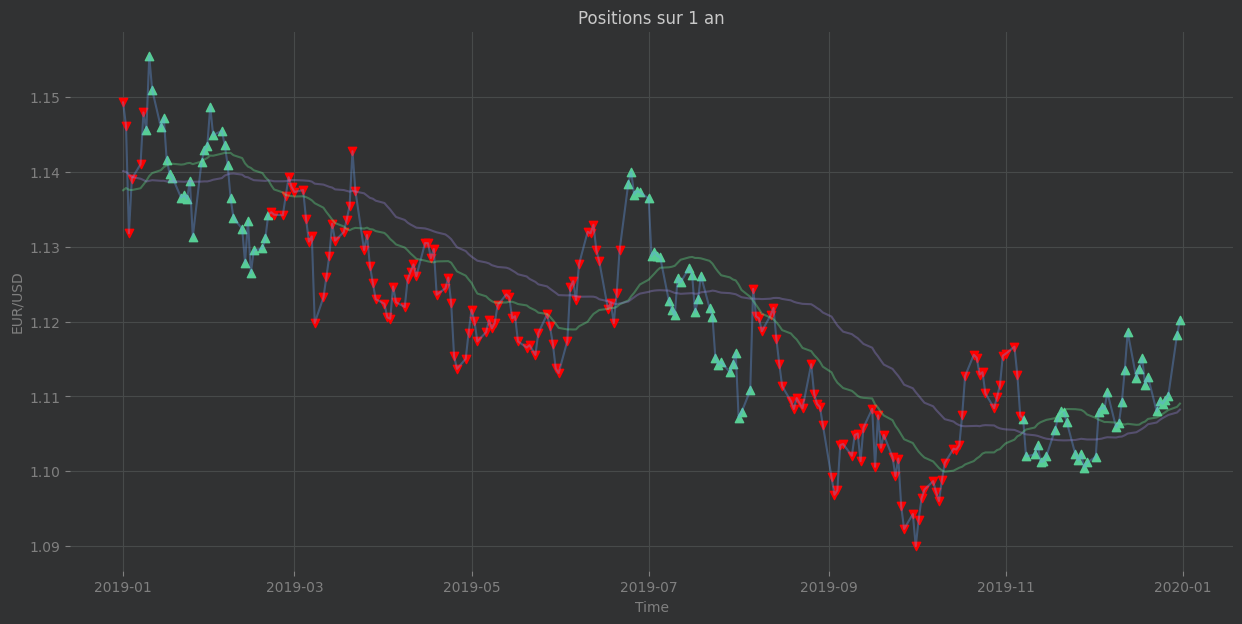

In [20]:
year = "2019"
idx_buy = df.loc[df["position"]==1].loc[year].index
idx_sell = df.loc[df["position"]==-1].loc[year].index
plt.figure(figsize=(15,7))
plt.scatter(idx_buy, df.loc[idx_buy]["close"].loc[year], color= "#57CE95", marker="^")
plt.scatter(idx_sell, df.loc[idx_sell]["close"].loc[year], color= "red", marker="v")

plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha=0.35)
plt.plot(df["close"].loc[year].index, df["SMA fast"].loc[year], alpha=0.35)
plt.plot(df["close"].loc[year].index, df["SMA slow"].loc[year], alpha=0.35)

plt.legend=["achat", "vente","close", "SMA fast", "SMA slow"]
plt.xlabel("Time")
plt.ylabel("EUR/USD")

plt.title("Positions sur 1 an")

plt.show()

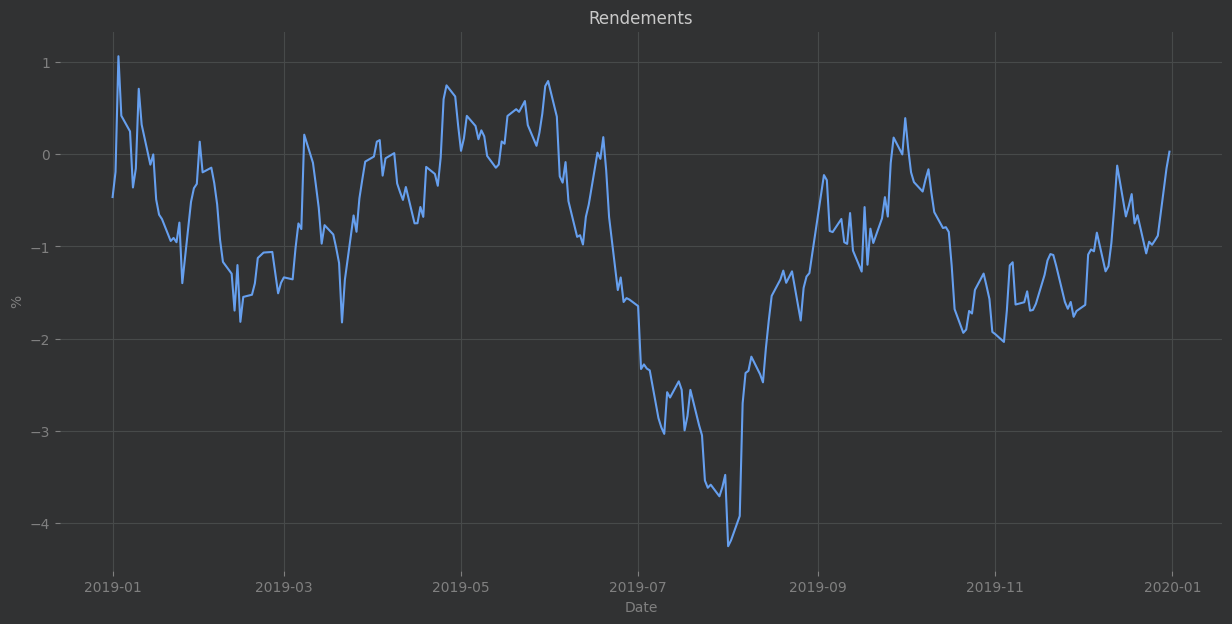

In [21]:
df["pct"] = df["close"].pct_change(1)
df["return"] = df["pct"] * df["position"].shift(1)

plt.figure(figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("%")
plt.title("Rendements")
plt.plot((df["return"].loc[year]*100).cumsum())

plt.show()
